In [1]:
# Load data
import requests
import pandas as pd
import json

# extracting over Singapore covid19 period
country = "singapore"
start_date = "2020-03-01"
end_date = "2023-04-19"


def fetch_data(country, start_date, end_date) -> pd.DataFrame:
    """
    Extract the api request for certain year and for given country and returns as dataframe
    :param country: Singapore as input
    :param start_date: begin date to pull
    :param end_date:  End date to pull
    :return: Dataframe of covid data
    """

    url = f'https://api.covid19api.com/country/{country}?from={start_date}T00:00:00Z&to={end_date}T00:00:00Z'
    response = requests.get(url)
    data_content = json.loads(response.content)
    df = pd.DataFrame(data_content)
    df['Date'] = df['Date'].str[:10]
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').set_index('Date')
    return df


# Fetch data
df = fetch_data(country, start_date, end_date)



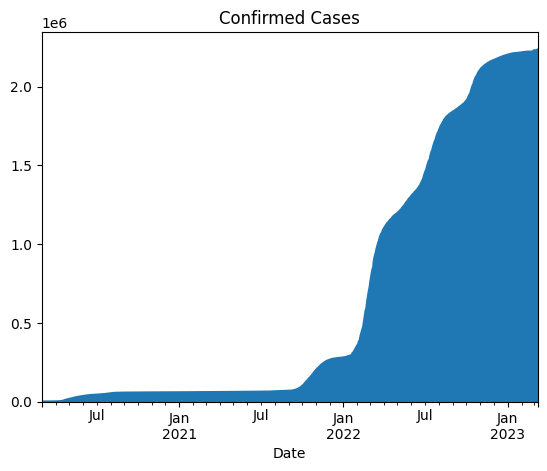

In [2]:
df.Confirmed.plot.area(title='Confirmed Cases');

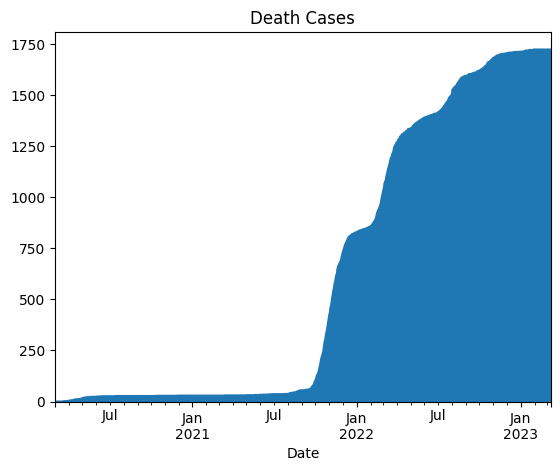

In [3]:
df.Deaths.plot.area(title='Death Cases');

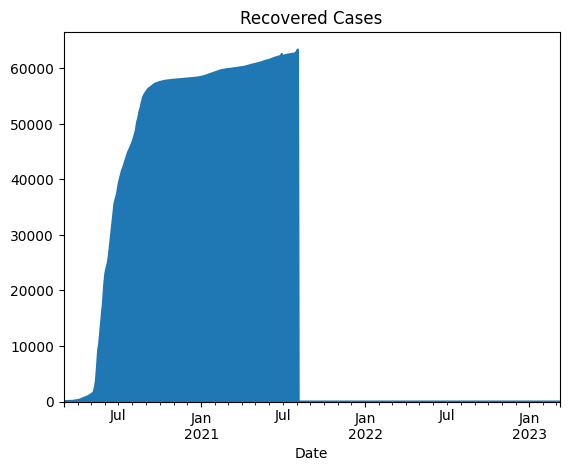

In [4]:
df.Recovered.plot.area(title='Recovered Cases');

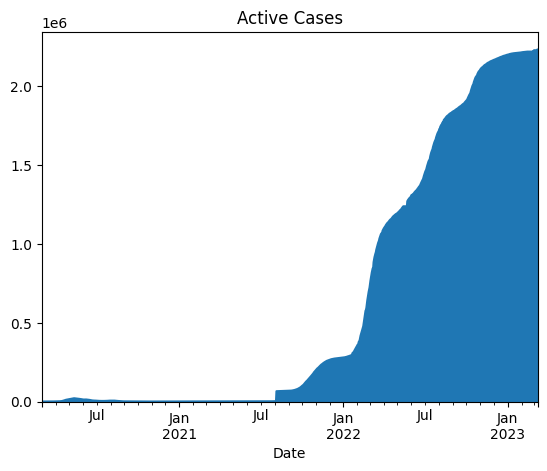

In [5]:
df.Active.plot.area(title='Active Cases');